# Ćwiczenie 5. Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych obrazów. Program powinien umożliwiać wyświetlanie obrazu wczytanego z pliku o podanej nazwie, wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego zapis do zadanego pliku.

Narzędziem wykorzystanym do przetwarzania obrazów będzie biblioteka *OpenCV (Open Source Computer Vision)*. Jest to wieloplatformowa biblioteka oparta na otwartym kodzie. Została napisana w języku C++, jednak możemy jej także używać w Pythonie dzięki odpowiednim nakładkom.

W pierwszej kolejności dokonujemy importów potrzebnych bibliotek: *OpenCV* oraz służącej do szkicowania wykresów *Matplotlib*.

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl

Wczytywanie obrazu o nazwie (ścieżce) `file` odbywa się przy użyciu bibliotecznej funkcji `imread`. Domyślnie obraz wczytywany jest w kolorze (24-bitowy format BGR, 8 bitów przypada na każdy z kolorów), natomiast podanie $0$ jako drugiego parametru pozwala wczytać obraz w skali szarości (256 poziomów szarości). Wczytany kolorowy obraz przechowywany jest jako trójwymiarowa tablica o kształcie $(M, N, 3)$, w której każdy piksel spośród $M$ rzędów i $N$ kolumn opisany jest 3 wartościami z zakresu $[0, 255]$, kolejno odnoszącymi się do koloru niebieskiego (B), zielonego (G) i czerwonego (R). Natomiast obraz wczytany w skali szarości dany jest tablicą o kształcie $(M, N)$, gdzie każdy piksel spośród M rzędów i N kolumn opisany jest pojedynczą wartością skali szarości z zakresu $[0, 255]$.

Funkcje `read_img_color` oraz `read_img_gray` zwracają odpowiednio kolorową lub szarą reprezentację obrazu z pliku `file`. Funkcje `display_img_color` oraz `display_img_gray` umożliwiają wizualizację wczytanego obrazu z pomocą biblioteki *Matplotlib*, odpowienio w kolorze lub w szarościach. Funkcja `display_img_color` potrzebuje przed rysowaniem konwersji z formatu BGR do RGB (jest to zamiana miejscami kanałów kolorów), ponieważ *OpenCV* domyślnie wczytuje kolory w układzie BGR, a do szkicowania w *Matplotlib* przyjmuje kolejność kanałów RGB. Natomiast w funkcji `display_img_gray` podajemy jako drugi argument `cmap='gray'`, który zapewnia wizualne odwzorowanie skali szarości w szare barwy.

In [3]:
def read_img_color(file):
    return cv.imread(file)

In [4]:
def read_img_gray(file):
    return cv.imread(file, 0)

In [5]:
def display_img_color(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [6]:
def display_img_gray(img):
    plt.imshow(img, cmap='gray')
    plt.show()

Przykładowy obraz `butterfly.jpg` jest poniżej wczytany i wyświetlony raz w kolorze, a raz w szarości. Pokazane są także kształty przechowujących go w obu przypadkach tablic. Warto zauważyć, że są to `numpy arrays`. Ponadto na osiach liczbowych towarzyszących wizualizacji możemy zauważyć, że punktem $(0, 0)$ jest lewy górny róg obrazu.

In [7]:
img1 = read_img_color('butterfly.jpg')
img2 = read_img_gray('butterfly.jpg')
print("Obraz w kolorze     typ: {}, wymiary: {}".format(type(img1), img1.shape))
print("Obraz w szarości    typ: {}, wymiary: {}".format(type(img2), img2.shape))

Obraz w kolorze     typ: <class 'numpy.ndarray'>, wymiary: (281, 450, 3)
Obraz w szarości    typ: <class 'numpy.ndarray'>, wymiary: (281, 450)


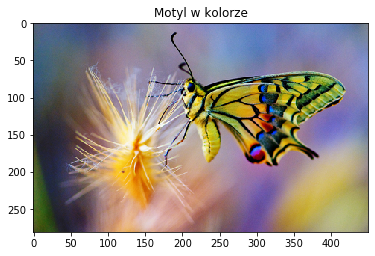

In [8]:
plt.title("Motyl w kolorze")
display_img_color(img1)

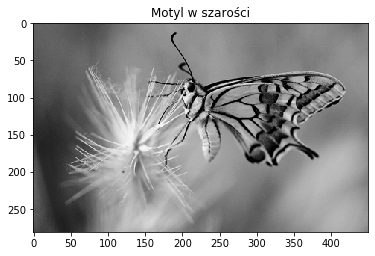

In [9]:
plt.title("Motyl w szarości")
display_img_gray(img2)

Następnie przedstawiona jest funkcja `select_subimage`, która zwraca prostokątny podobraz obrazu `img` o granicach od `x0` do `x1` włącznie na osi poziomej oraz od `y0` do `y1` włącznie na osi pionowej (licząc od punktu $(0, 0)$, który jest w górnym lewym rogu obrazu).

In [10]:
def select_subimage(img, x0, x1, y0, y1):
    if len(img.shape) == 2:
        height, width = img.shape
    else:
        height, width, depth = img.shape
        
    if(x0 < 0) : x0 = 0
    if(x1 > width - 1): x1 = width - 1
    if(y0 < 0): y0 = 0
    if(y1 > height - 1): y1 = height - 1
    
    return img[y0:y1+1, x0:x1+1]

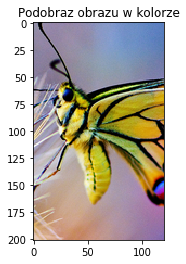

In [11]:
img3 = select_subimage(img1, 180, 300, 20, 220)
plt.title("Podobraz obrazu w kolorze")
display_img_color(img3)

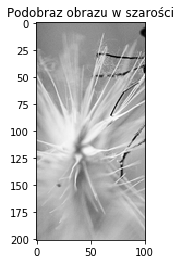

In [12]:
img4 = select_subimage(img2, 100, 200, 50, 250)
plt.title("Podobraz obrazu w szarości")
display_img_gray(img4)

Funkcja `select_subimage_and_save_to_file` wymaga podania tych samych argumentów co `select_subregion` oraz dodatkowego `file`, który zadaje plik, do którego zapiszemy wyodrębniony podobraz. Format pliku zostanie określony na podstawie rozszerzenia po kropce w `file`, np. `file="butterfly3.png"`.

In [13]:
def select_subimage_and_save_to_file(img, x0, x1, y0, y1, file):
    subimg = select_subimage(img, x0, x1, y0, y1)
    cv.imwrite(file, subimg)

In [14]:
select_subimage_and_save_to_file(img1, 180, 300, 20, 220, "butterfly3.png")

Przekształcenie punktowe T obrazu ma ogólną postać s = T (r), gdzie r, s oznaczają odpowiednio poziom szarości piksela obrazu wejściowego i wyjściowego.

# Ćwiczenie 6. Zaobserwuj działanie następujących przekształceń punktowych na przykładowych obrazach.

## Mnożenie obrazu przez stałą $T(r)=c \cdot r$, gdzie $c$ jest stałą.

Na początku wczytamy obraz w szarości.

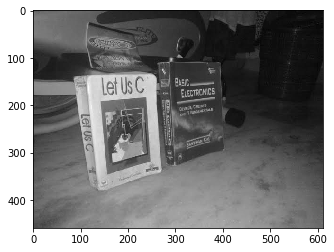

Wymiary: (459, 612), typ danych: uint8


In [89]:
img5 = read_img_gray('left.jpg')
display_img_gray(img5)
print("Wymiary: {}, typ danych: {}".format(img5.shape, img5.dtype))

Typ danych `uint8` (8-bitowa liczba całkowita bez znaku) oznacza, że wartość każdego piksela w skali szarości dana jest jako liczba całkowita z zakresu $[0, 255]$. Jednak przy mnożeniu obrazu przez stałą możemy tak ją dobrać, że wyniki działań wyjdą poza zakres szarości. Przyjmiemy wtedy, że będą równe największej możliwej wartości z zakresu.

Mnożenie obrazu `img` przez stałą `c` oraz zachowanie całkowitych wartości szarości z zakresu $[0, 255]$ realizuje funkcja `constant_multiply` (za przycinanie zakresu odpowiada funkcja `np.clip`).

In [16]:
#UWAGA: c musi być zapisane z dziesiętną kropką, aby zaszła niejawna konwersja typów
def constant_multiply(img, c): 
    return np.uint8(np.clip(img*c, 0, 255))

Poniżej empiryczne testy mnożenia obrazu przez różne stałe $c$. Zauważmy, że mnożenie przez $c=1$ daje przekształcenie identycznościowe, czyli obraz bez zmian.

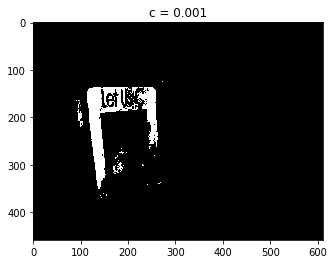

In [17]:
plt.title("c = 0.001")
img5_c1 = constant_multiply(img5, 0.005)
display_img_gray(img5_c1)

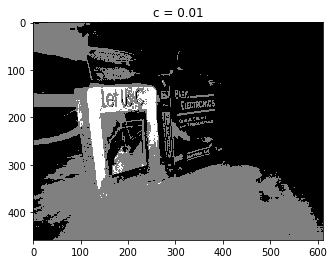

In [18]:
plt.title("c = 0.01")
img5_c2 = constant_multiply(img5, 0.01)
display_img_gray(img5_c2)

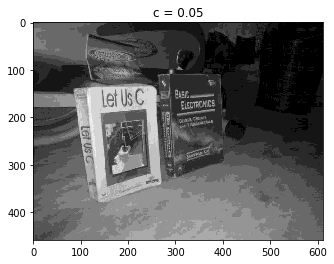

In [19]:
plt.title("c = 0.05")
img5_c3 = constant_multiply(img5, 0.05)
display_img_gray(img5_c3)

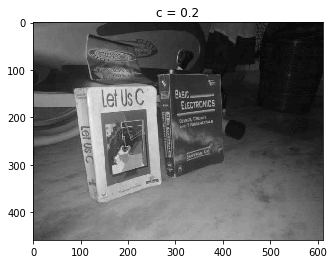

In [20]:
plt.title("c = 0.2")
img5_c4 = constant_multiply(img5, 0.2)
display_img_gray(img5_c4)

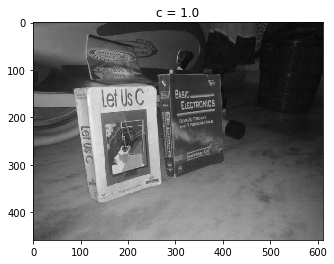

In [21]:
plt.title("c = 1.0")
img5_c5 = constant_multiply(img5, 1.0)
display_img_gray(img5_c5)

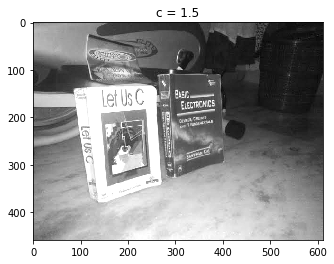

In [22]:
plt.title("c = 1.5")
img5_c6 = constant_multiply(img5, 1.5)
display_img_gray(img5_c6)

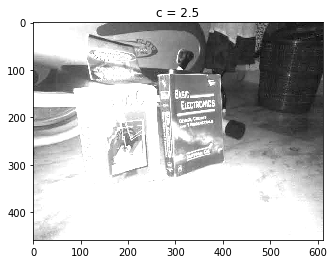

In [23]:
plt.title("c = 2.5")
img5_c7 = constant_multiply(img5, 2.5)
display_img_gray(img5_c7)

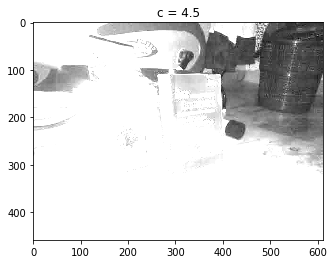

In [24]:
plt.title("c = 4.5")
img5_c8 = constant_multiply(img5, 4.5)
display_img_gray(img5_c8)

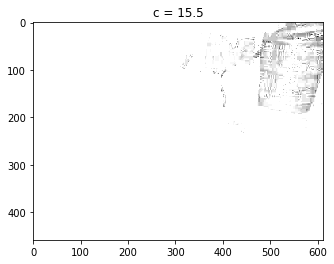

In [25]:
plt.title("c = 15.5")
img5_c9 = constant_multiply(img5, 15.5)
display_img_gray(img5_c9)

Stopniowy przegląd zbadanych wartości stałych $c$ od bardzo małych do bardzo dużych pozwala stwierdzić, że mnożenie przez stałą wpływa na jasność, a także na kontrast. Dla małych wartości $c<1$ kolory są w większości bardzo ciemne i jedynie kontrastująca biel książki na pierwszym planie jest zachowana. Natomiast przy mnożeniu przez coraz większe wartości $c>1$ kolejne wartości skali szarości przekraczają $255$ i tym samym coraz większa część obrazka staje się biała, na ostatnim zdjęciu już tylko oryginalnie najciemniejszy kosz na śmieci odznacza się lekką szarością na tle pozostałej bieli.


## Zmianę dynamiki skali szarości (kontrastu). Możesz zastosować transformację o postaci $$T(r) = \frac{1}{1 + \left( \frac{m}{r}\right) ^e}$$ gdzie $m$ i $e$ są ustalonymi parametrami przekształcenia (np. $m = 0,45$, $e = 8$). Wykreśl $T(r)$, by lepiej uwidocznić wpływ $T$ na kontrast obrazu wyjściowego. Przeprowadź eksperymenty z różnymi wartościami parametrów $m$ i $e$.

Zmianę dynamiki skali szarości (kontrastu) obrazu `img` zrealizuje funkcja `contrast_dynamic`, która przyjmuje dodatkowo argumenty `m` oraz `e`. Wejściowe wartości skali szarości (`uint8` z zakresu $[0, 255]$) zostaną znormalizowane do obliczeń do przedziału $r\in[0, 1]$. Następnie po wykonaniu transformacji $T(r)$ wartości wyjściowe znów zostaną przywrócone do zakresu $[0, 255]$.

Aby usprawnić obliczenia, tablica `lookup_table` przechowa mapowanie każdej wartości skali szarości $i$ spośród możliwych $256$ na wartość po transformacji dla zadanych wartości argumentów `m` i `e` (po drodze konwertuje na `uint8`). Pozwala to następnie użyć bibliotecznej metody `cv.LUT`, która podmienia wartości skali szarości wejściowego obrazu `img` na te stablicowane w `lookup_table`. Jako że dla $i=0$ wystąpi dzielenie przez $0$, osobno wpisujemy wartość $0$ do `lookup_table`.

In [26]:
def contrast_dynamic(img, m, e):
    lookup_table = np.array([1/(1+(m/(i/255.0))**e) * 255 for i in np.arange(1, 256)], dtype='uint8')
    lookup_table = np.insert(lookup_table, 0, 0)
    return cv.LUT(img, lookup_table)

Poniżej przedstawiono przebiegi funkcji $T(r)$ dla różnych wartości $m$ i $e$.

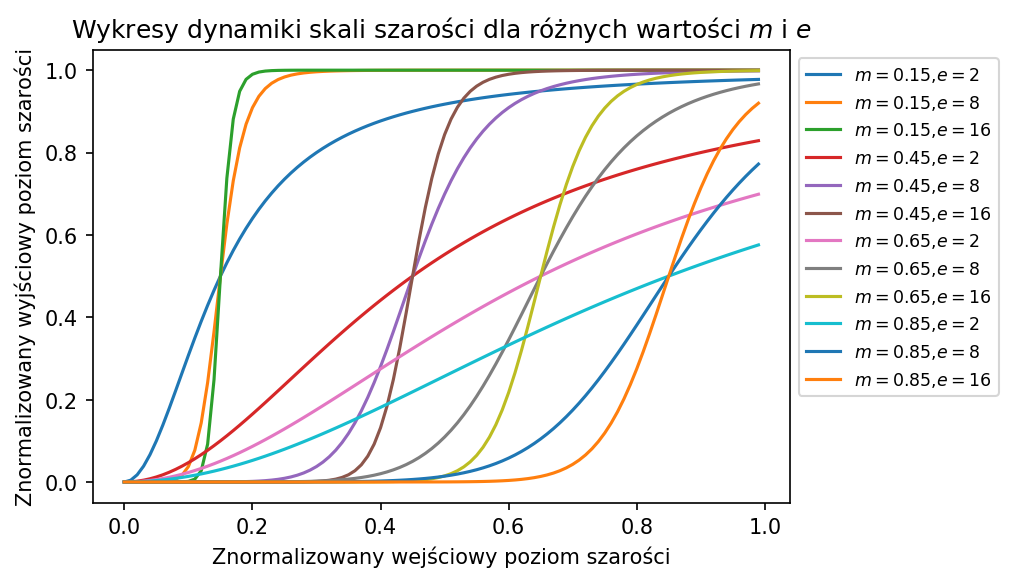

In [71]:
mpl.rcParams['figure.dpi']= 150
r = np.arange(0.00000000000001, 1.0, 0.01)
t1 = 1/(1+(0.15/r)**2.0)
t2 = 1/(1+(0.15/r)**8.0)
t3 = 1/(1+(0.15/r)**16.0)
t4 = 1/(1+(0.45/r)**2.0)
t5 = 1/(1+(0.45/r)**8.0)
t6 = 1/(1+(0.45/r)**16.0)
t7 = 1/(1+(0.65/r)**2.0)
t8 = 1/(1+(0.65/r)**8.0)
t9 = 1/(1+(0.65/r)**16.0)
t10 = 1/(1+(0.85/r)**2.0)
t11 = 1/(1+(0.85/r)**8.0)
t12 = 1/(1+(0.85/r)**16.0)
plt.plot(r, t1, label='$m=0.15$,$e=2$')
plt.plot(r, t2, label='$m=0.15$,$e=8$')
plt.plot(r, t3, label='$m=0.15$,$e=16$')
plt.plot(r, t4, label='$m=0.45$,$e=2$')
plt.plot(r, t5, label='$m=0.45$,$e=8$')
plt.plot(r, t6, label='$m=0.45$,$e=16$')
plt.plot(r, t7, label='$m=0.65$,$e=2$')
plt.plot(r, t8, label='$m=0.65$,$e=8$')
plt.plot(r, t9, label='$m=0.65$,$e=16$')
plt.plot(r, t10, label='$m=0.85$,$e=2$')
plt.plot(r, t11, label='$m=0.85$,$e=8$')
plt.plot(r, t12, label='$m=0.85$,$e=16$')
plt.title("Wykresy dynamiki skali szarości dla różnych wartości $m$ i $e$")
plt.xlabel("Znormalizowany wejściowy poziom szarości")
plt.ylabel("Znormalizowany wyjściowy poziom szarości")
plt.legend(fontsize="small", bbox_to_anchor=(1,1), loc="upper left")
plt.show()
mpl.rcParams['figure.dpi'] = 72

Analiza wykresu pozwala stwierdzić, że funkcja $T(r)$ ma punkt przegięcia w pobliżu punktu $m$, zatem manipulując tym parametrem, można przesuwać funkcję; im $m$ mniejsze, tym punkt przegięcia jest bardziej na lewo, im $m$ większe, tym punkt przegięcia jest bardziej na prawo. Jeżeli potraktować $m$ jako znormalizowany poziom szarości, to ogólnie mówiąc wartości wejściowe poniżej $m$ zostaną ściemnione, a wartości powyżej $m$ zostaną rozjaśnione. Czyli dla małych $m$ więcej będzie na przekształconym obrazki jasnych miejsc, a dla dużych $m$ będzie więcej ciemnych miejsc.

Natomiast $e$ steruje w pewnym sensie dynamiką wzrostu funkcji w okolicy punktu przegięcia, czyli dynamiką skali szarości. Im $e$ większe, tym większy kontrast uzyskamy, to znaczy wejściowe poziomy szarości zostaną w większości odwzorowane w końce skali szarości, albo bardzo ciemne, albo bardzo jasne (punktem rodzielającym wartości wejściowe na transformowane w ciemne albo w jasne jest w przybliżeniu wartość $m$). Dla mniejszego $e=2$ przebieg funkcji jest łagodniejszy, czyli odwzorowanie mniej kontrastowe.

Poniższe empiryczne przekształcenia obrazków pozwalają potwierdzić teoretyczne przypuszczenia.

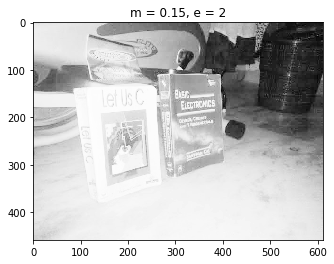

In [60]:
plt.title("m = 0.15, e = 2")
img5_cd1 = contrast_dynamic(img5, 0.15, 2)
display_img_gray(img5_cd1)

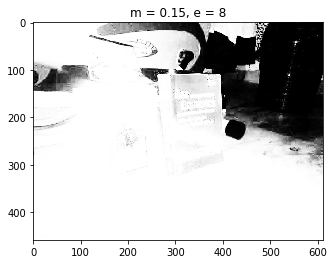

In [62]:
plt.title("m = 0.15, e = 8")
img5_cd2 = contrast_dynamic(img5, 0.15, 8)
display_img_gray(img5_cd2)

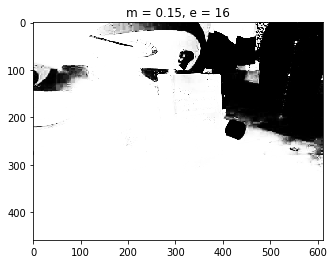

In [63]:
plt.title("m = 0.15, e = 16")
img5_cd3 = contrast_dynamic(img5, 0.15, 16)
display_img_gray(img5_cd3)

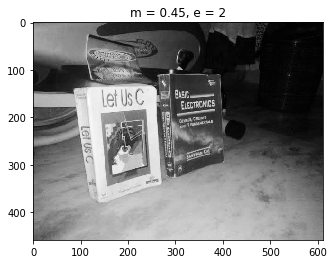

In [64]:
plt.title("m = 0.45, e = 2")
img5_cd4 = contrast_dynamic(img5, 0.45, 2)
display_img_gray(img5_cd4)

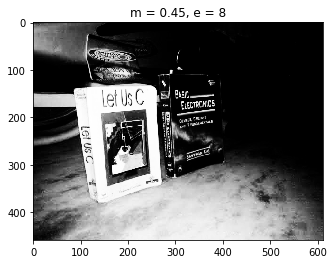

In [65]:
plt.title("m = 0.45, e = 8")
img5_cd5 = contrast_dynamic(img5, 0.45, 8)
display_img_gray(img5_cd5)

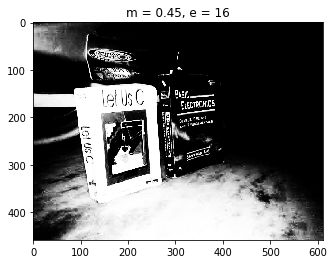

In [66]:
plt.title("m = 0.45, e = 16")
img5_cd6 = contrast_dynamic(img5, 0.45, 16)
display_img_gray(img5_cd6)

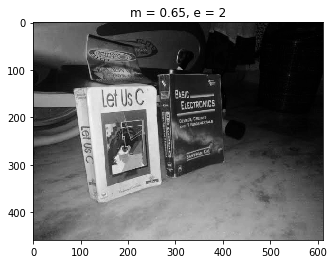

In [67]:
plt.title("m = 0.65, e = 2")
img5_cd7 = contrast_dynamic(img5, 0.65, 2)
display_img_gray(img5_cd7)

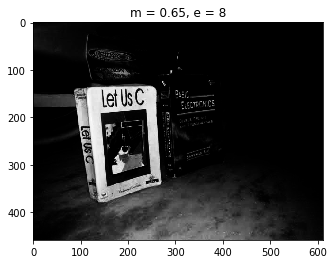

In [68]:
plt.title("m = 0.65, e = 8")
img5_cd8 = contrast_dynamic(img5, 0.65, 8)
display_img_gray(img5_cd8)

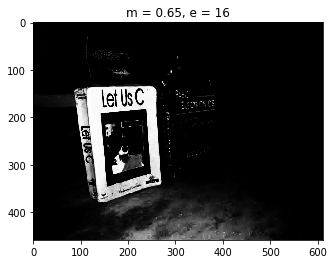

In [69]:
plt.title("m = 0.65, e = 16")
img5_cd9 = contrast_dynamic(img5, 0.65, 16)
display_img_gray(img5_cd9)

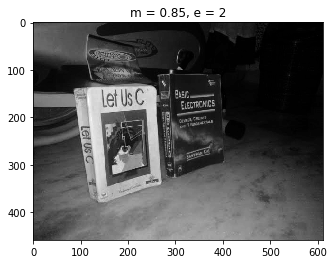

In [70]:
plt.title("m = 0.85, e = 2")
img5_cd10 = contrast_dynamic(img5, 0.85, 2)
display_img_gray(img5_cd10)

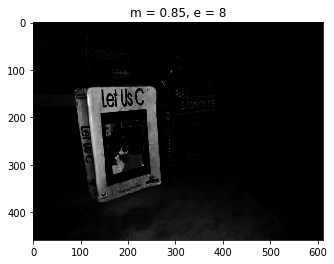

In [72]:
plt.title("m = 0.85, e = 8")
img5_cd11 = contrast_dynamic(img5, 0.85, 8)
display_img_gray(img5_cd11)

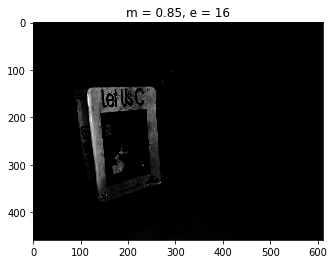

In [73]:
plt.title("m = 0.85, e = 16")
img5_cd12 = contrast_dynamic(img5, 0.85, 16)
display_img_gray(img5_cd12)

Na ostatnich obrazkach nie uzyskaliśmy dużego kontrastu mimo dużych wartości $e$, ponieważ najwyraźniej w obrazie nie było tyle pikseli o poziomie szarości powyżej dużej wartości $m=0.85$.

## Korekcję gamma, zdefiniowaną jako $s=c \cdot r^\gamma$ , gdzie $c>0$ i $γ>0$ są stałymi we wzorze przekształcenia.

Korekcja gamma to nieliniowe przekształcenie, które ma na celu lepszą dla ludzkiego oka reprezentację luminancji. Nielinearność naszego postrzegania światła powoduje, że jesteśmy wyczuleni na zmiany w bardzo ciemnych punktach obrazu, natomiast różnic w punktach bardzo jasnych nie odbieramy tak dobrze. Wobec tego korekcja gamma pozwala lepiej rozseparować ciemne punkty, a jasne do siebie zbliżyć.

Korekcja gamma obrazu `img` przeprowadzona zostanie w funkcji `gamma_correction`. Wartość stałej $c$ we wzorze $s=c \cdot r^γ$ jest typowo przyjmowana jako $c=1.0$, aby zachować standardowy zakres $r \in [0, 1]$. Natomiast wartość $\gamma$ jest podawana jako argument `gamma`.

Zauważmy, że wartości skali szarości są z zakresu $[0, 255]$ (typ danych `uint8`). Aby znormalizować wartość $i$ z tego zakresu, należy podzielić ją przez maksymalną wartość, czyli $255$, mamy wtedy gwarancję, że $r=\frac{i}{255}$ będzie z zakresu $[0,1]$. Następnie znormalizowana wartość podnoszona jest do potęgi `gamma` (po potęgowaniu dalej jesteśmy w przedziale $[0,1]$), po czym mnożona przez stałą $c=1$ (implicite) i przez $255$ (powrót do przedziału $[0,255]$). Po drodze dokonujemy konwersji na typ `uint8`, aby wartości były wyłącznie całkowite.

W funkcji `gamma_correction` tworzymy tablicę `lookup_table`, w której mapujemy każdą wartość skali szarości spośród możliwych $256$ na wartość po transformacji dla zadanej wartości argumentu `gamma`. Pozwala to następnie użyć bibliotecznej metody `cv.LUT`, która podmienia wartości skali szarości wejściowego obrazu `img` na te stablicowane w `lookup_table`. Funkcja `gamma_correction` zwraca wynikowy obraz takiego przekształcenia. 

In [32]:
def gamma_correction(img, gamma):
    lookup_table = np.array([((i/255.0)**gamma) * 255 for i in np.arange(0, 256)], dtype='uint8')
    return cv.LUT(img, lookup_table)

Poniżej testujemy działanie funkcji `gamma_correction` dla różnych wartości parametru `gamma`, testowany obraz jest dość ciemny. Warto zauważyć, że ze wzoru wynika, że dla $\gamma=1$ dostajemy na wyjściu dokładnie ten sam obraz, który podajemy na wejściu.

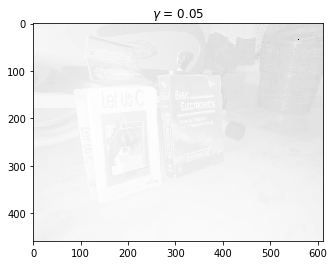

In [33]:
plt.title("$\gamma$ = 0.05")
img5_g1 = gamma_correction(img5, 0.05)
display_img_gray(img5_g1)

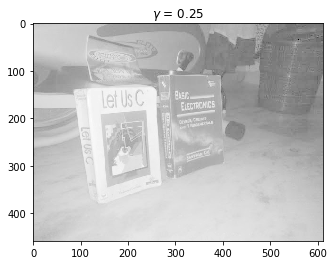

In [34]:
plt.title("$\gamma$ = 0.25")
img5_g2 = gamma_correction(img5, 0.25)
display_img_gray(img5_g2)

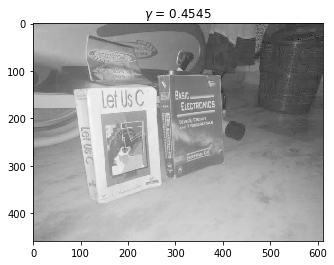

In [35]:
plt.title("$\gamma$ = 0.4545")
img5_g3 = gamma_correction(img5, 0.4545)
display_img_gray(img5_g3)

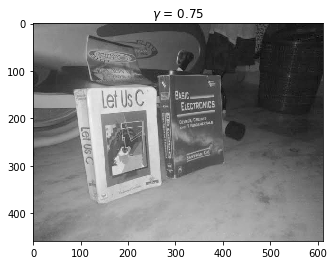

In [36]:
plt.title("$\gamma$ = 0.75")
img5_g4 = gamma_correction(img5, 0.75)
display_img_gray(img5_g4)

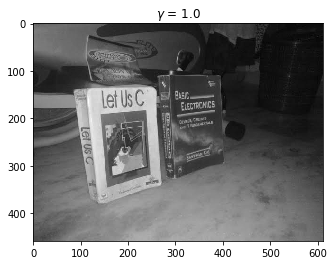

In [37]:
plt.title("$\gamma$ = 1.0")
img5_g5 = gamma_correction(img5, 1.0)
display_img_gray(img5_g5)

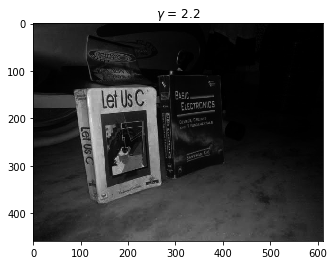

In [38]:
plt.title("$\gamma$ = 2.2")
img5_g6 = gamma_correction(img5, 2.2)
display_img_gray(img5_g6)

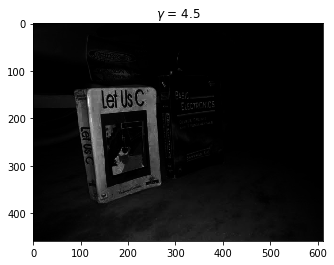

In [39]:
plt.title("$\gamma$ = 4.5")
img5_g7 = gamma_correction(img5, 4.5)
display_img_gray(img5_g7)

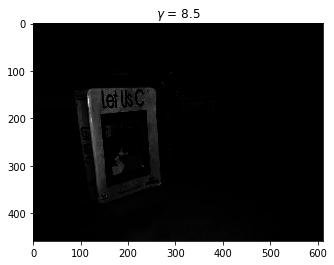

In [40]:
plt.title("$\gamma$ = 8.5")
img5_g8 = gamma_correction(img5, 8.5)
display_img_gray(img5_g8)

Otrzymane w wyniku korekcji gamma obrazy pozwalają stwierdzić, że wartości $\gamma<1$ rozjaśniają ciemne obszary obrazu, natomiast dla $\gamma>1$ mamy efekt przyciemnienia jasnych obszarów. Dla $\gamma=0.05$ efekt jest zbyt jasny i męczący dla oczu, ale już dla $\gamma=0.454545$ separacja ciemnych barw jest na tyle dobra, że możemy wzrokowo wydrębnić kosz na śmieci stojący w rogu, który nie sposób rozpoznać na oryginalnym zdjęciu, a przy tym patrzenie na efekt transformacji nie jest uciążliwe. Wartość $1/2.2 = 0.(45)$ jest właśnie typowo stosowaną w kodowaniach obrazu w systemach komputerowych wartością parametru $\gamma$.

Wraz ze wzrostem badanych wartości $\gamma$ jasne obszary zdjęcia powoli przestają być rozróżnialne, stopniowo ciemnieją podłoga i drugi plan, a przy ekstremalnej wartości $\gamma=8.5$ niewyraźnie widoczna jest już tylko biała na oryginalnym zdjęciu książka.

Warto zauważyć, że przy tej korekcji kontrasty są znacznie łagodniejsze niż przy liniowej transformacji z punktu *a* oraz przy zmianie dynamiki skali szarości z punktu b.

Podsumowaniem będzie tu wykres, na którym przedstawiono zależność znormalizowanego wyjściowego poziomu szarości od znormalizowanego wejściowego poziomu szarości w transformacji gamma dla różnych wartości parametru $\gamma$. Dobrze widać tu nieliniowość przekształcenia - dla małych wartości $\gamma<1$ ciemne piksele są znacząco rozjaśniane, odwrotnie, dla dużych wartości $\gamma>1$ większość jasnych pikseli w wyniku transformacji jest zdecydowanie ściemniona.

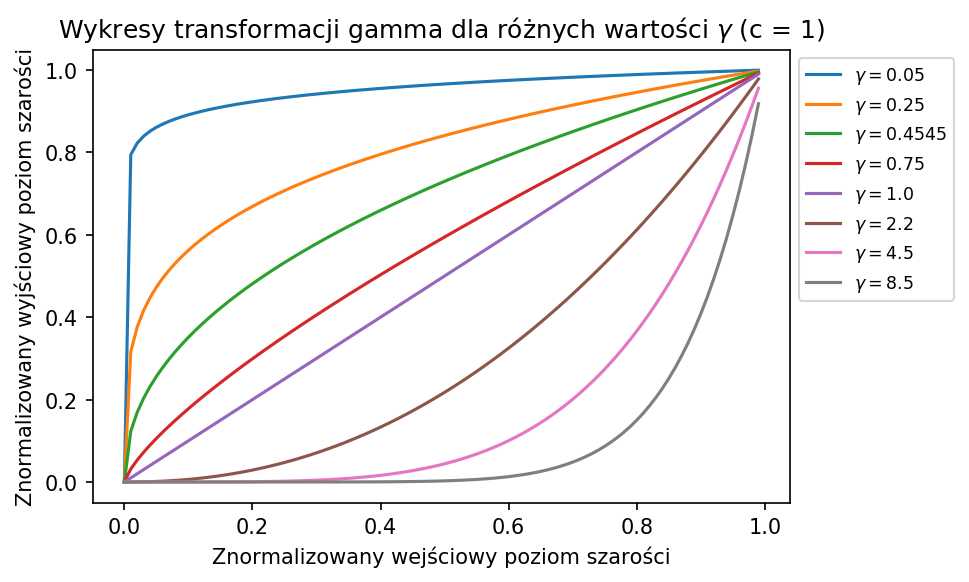

In [74]:
mpl.rcParams['figure.dpi']= 150
r = np.arange(0.0, 1.0, 0.01)
s1 = r**0.05
s2 = r**0.25
s3 = r**0.454545
s4 = r**0.75
s5 = r**1.0
s6 = r**2.2
s7 = r**4.5
s8 = r**8.5
plt.plot(r, s1, label='$\gamma=0.05$')
plt.plot(r, s2, label='$\gamma=0.25$')
plt.plot(r, s3, label='$\gamma=0.4545$')
plt.plot(r, s4, label='$\gamma=0.75$')
plt.plot(r, s5, label='$\gamma=1.0$')
plt.plot(r, s6, label='$\gamma=2.2$')
plt.plot(r, s7, label='$\gamma=4.5$')
plt.plot(r, s8, label='$\gamma=8.5$')
plt.title("Wykresy transformacji gamma dla różnych wartości $\gamma$ (c = 1)")
plt.xlabel("Znormalizowany wejściowy poziom szarości")
plt.ylabel("Znormalizowany wyjściowy poziom szarości")
plt.legend(fontsize="small", bbox_to_anchor=(1,1), loc="upper left")
plt.show()
mpl.rcParams['figure.dpi']= 72

# Ćwiczenie 7. Wypróbuj działanie wyrównywania histogramu na przykładowych obrazach. By zaobserwować skuteczność procedury, poddaj wyrównywaniu obrazy zbyt ciemne i zbyt jasne. Narysować histogramy obrazów przed i po wyrównaniu.

Najpierw wczytane zostaną obraz zbyt ciemny (`cave.jpg`) i zbyt jasny (`snow.jpg`). Następnie pokażemy ich początkowe histogramy, obliczone za pomocą funkcji bibliotecznej `cv.calcHist`. Na histogramie możemy zobaczyć, jak wiele jest w danym obrazie pikseli o danym poziomie szarości.

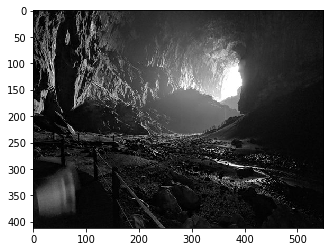

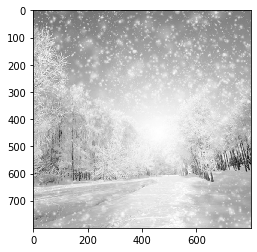

In [113]:
imh1 = read_img_gray("cave.jpg")
display_img_gray(imh1)
imh2 = read_img_gray("snow.jpg")
display_img_gray(imh2)

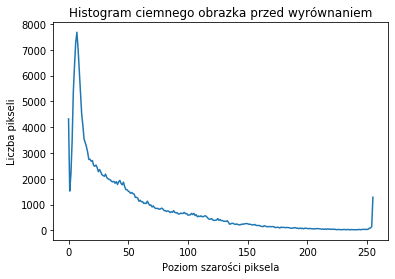

In [114]:
hist1 = cv.calcHist([imh1], [0], None, [256], [0,256])
plt.plot(hist1)
plt.title("Histogram ciemnego obrazka przed wyrównaniem")
plt.xlabel("Poziom szarości piksela")
plt.ylabel("Liczba pikseli")
plt.show()

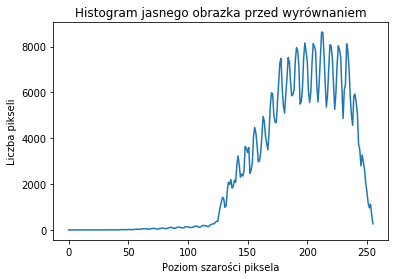

In [115]:
hist2 = cv.calcHist([imh2], [0], None, [256], [0,256])
plt.plot(hist2)
plt.title("Histogram jasnego obrazka przed wyrównaniem")
plt.xlabel("Poziom szarości piksela")
plt.ylabel("Liczba pikseli")
plt.show()

Pobieżna analiza pozwala stwierdzić, że w obrazku ciemnym znajduje się niewiele pikseli o poziomie szarości powyżej $150$, natomiast w obrazku jasnym praktycznie nie występują piksele o poziomie szarości poniżej $125$.

Następnie przeprowadzone zostanie wyrównywanie histogramu dla wybraych obrazków. Procedurę realizuje biblioteczna funkcja `cv.equalizeHist`.

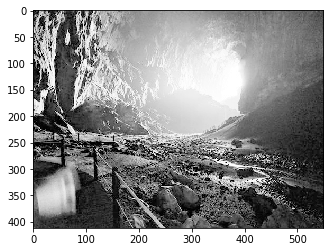

In [111]:
imh1_equ = cv.equalizeHist(imh1)
display_img_gray(imh1_equ)

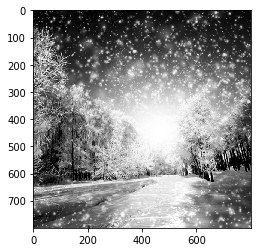

In [112]:
imh2_equ = cv.equalizeHist(imh2)
display_img_gray(imh2_equ)

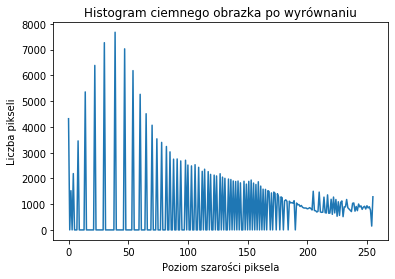

In [118]:
hist1_equ = cv.calcHist([imh1_equ], [0], None, [256], [0,256])
plt.plot(hist1_equ)
plt.title("Histogram ciemnego obrazka po wyrównaniu")
plt.xlabel("Poziom szarości piksela")
plt.ylabel("Liczba pikseli")
plt.show()

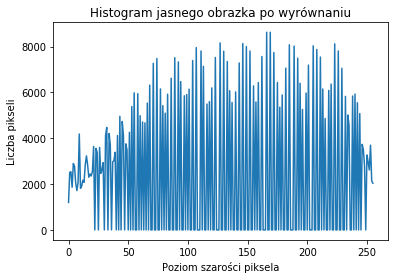

In [119]:
hist2_equ = cv.calcHist([imh2_equ], [0], None, [256], [0,256])
plt.plot(hist2_equ)
plt.title("Histogram jasnego obrazka po wyrównaniu")
plt.xlabel("Poziom szarości piksela")
plt.ylabel("Liczba pikseli")
plt.show()

Otrzymane w wyniku wyrównania histogramu obrazy są na pewno bardziej kontrastowe niż pierwotne, co widać na pierwszy rzut oka. Łatwiej wyodrębnić na nich wzrokowo szczegóły i odróżnić pojedyncze obiekty. Większa kontrastowość znajduje odzwierciedlenie w nowych histogramach, które mają teraz bardziej równomierny rozkład na całej dostępnej skali szarości. Nie ma już niedoreprezentowanych obszarów skali szarości widocznych na histogramach przed procedurą wyrównywania.

# Ćwiczenie 8.

##  Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomoc liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski rozmiaru $3×3$.

Szum typu "sól i pieprz" objawia się gdznieniegdzie występującymi białymi lub czarnymi pikselami, które nie pasują do otaczających je pikseli.

Na początek wczytamy obraz, na którym pojawiają się zakłócenia tego typu.

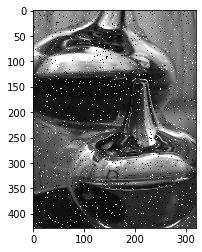

In [128]:
imgsp = read_img_gray("s&p.png")
display_img_gray(imgsp)

Aby pozbyć się szumu tego typu, można wykorzystać liniowy filtr uśredniający. Jest to rodzaj filtru wygładzającego, to znaczy służącego do eliminacji ostrych zmian w intensywności sąsiednich pikseli, nada się więc do likwidacji pojedycznczych zakłóconych pikseli.

Matematycznie zależność wygląda następująco:

$$f(x,y) = \frac{1}{m^2} \sum _{(r, c) \in S_{xy}} g(r, c)$$

gdzie $f(x,y)$ to wynikowy poziom szarości piksela o współrzędnych $(x,y)$, który jest średnią arytmetyczną z wartości otaczających go pikseli $g(r, c)$ wziętych z kwadratu $S_{xy}$ o boku o nieparzystej długości $m$, którego środkowym punktem jest piksel $(x, y)$. Ów kwadrat pikseli nazywamy maską o rozmiarze $m$ x $m$.

Do realizacji liniowego filtru uśredniającego zostanie wykorzystana biblioteczna funkcja `cv.blur`, której argumentami jest obraz do przetworzenia oraz rozmiar nakładanej maski.

Poniżej zostaną przeprowadzone eksperymenty dla różnych rozmiarów masek.

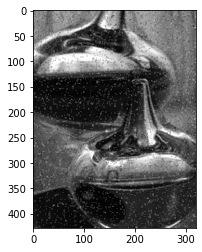

In [137]:
imgsp_a3 = cv.blur(imgsp, (3, 3))
display_img_gray(imgsp_a3)

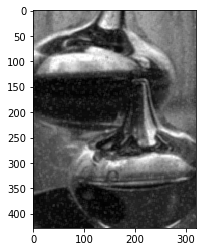

In [138]:
imgsp_a5 = cv.blur(imgsp, (5, 5))
display_img_gray(imgsp_a5)

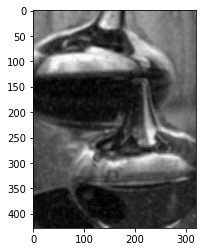

In [139]:
imgsp_a7 = cv.blur(imgsp, (7, 7))
display_img_gray(imgsp_a7)

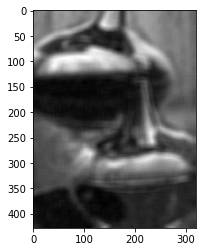

In [140]:
imgsp_a13 = cv.blur(imgsp, (13, 13))
display_img_gray(imgsp_a13)

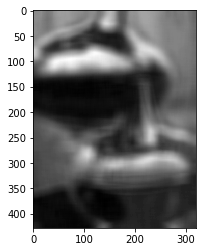

In [141]:
imgsp_a21 = cv.blur(imgsp, (21, 21))
display_img_gray(imgsp_a21)

Można zauważyć, że zwiększanie rozmiaru maski powoduje coraz skuteczniejszą eliminację szumu, jednak dzieje się to kosztem rozmycia szczegółów (jak sama nazwa funkcji `cv.blur` wskazuje). Jest to właśnie wygładzające działanie filtru, które powoduje stopniową utratę ostrości, ponieważ piksele tracą indywidualne wartości zastępowane wartościami średnimi z coraz większych obszarów. Stopniowe rozmazywanie krawędzi wynika z tego, że wyliczona średnia wartość piksela może być inna niż wszystkie wartości wokół, czyli zupełnie nieobecna w danym regionie w obrazie początkowym. Małe maski nie spisują się świetnie, ponieważ jedna odstająca wartość w obszarze pokrytym maską może znacząco podbić lub obniżyć wyliczoną średnią i w konsekwencji szum nie zostanie w pełni usunięty.

##  Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomoc nieliniowego filtra medianowego.

Filtr medianowy nie jest filtrem liniowym, co oznacza, że wartość piksela po przekształceniu nie jest kombinacją liniową wektorów biorących udział w przekształceniu (jak to było w filtrze uśredniającym).

Matematyczna zasada działania filtru medianowego jest intuicyjna:

$$ f(x,y) = \underset {(r, c) \in S_{xy}} {\operatorname{med}} g(r, c)$$

co oznacza, że piksel wynikowy to mediana spośród wartości pikseli otaczających (należących do kwadratu $S_{xy}$ o środku w $(x,y)$ i rozmiarze $m$ x $m$).

Realizację filtru medianowego zapewnia biblioteczna funkcja `cv.medianBlur`, która przyjmuje jako argumenty obraz do przetworzenia oraz pojedynczy wymiar kwadratowej maski.

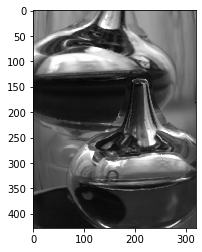

In [147]:
imgsp_m3 = cv.medianBlur(imgsp, 3)
display_img_gray(imgsp_m3)

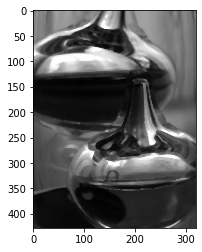

In [148]:
imgsp_m5 = cv.medianBlur(imgsp, 5)
display_img_gray(imgsp_m5)

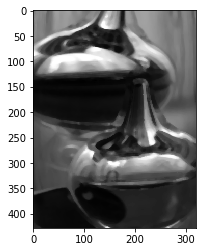

In [149]:
imgsp_m7 = cv.medianBlur(imgsp, 7)
display_img_gray(imgsp_m7)

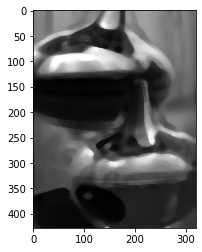

In [150]:
imgsp_m13 = cv.medianBlur(imgsp, 13)
display_img_gray(imgsp_m13)

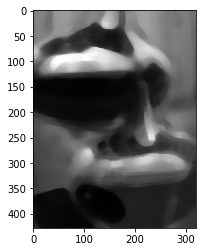

In [151]:
imgsp_m21 = cv.medianBlur(imgsp, 21)
display_img_gray(imgsp_m21)

Już na pierwszy rzut oka można stwierdzić, że filtr medianowy lepiej eliminuje szumy niż filtr uśredniający. Wynika to z faktu, że mediana z obszaru maski jest zawsze wartością faktycznie w tym obszarze obecną, stąd nie powstają nowe nierealistyczne wartości pikseli i krawędzie są lepiej zachowane. Podobnie mediana jest "odporna" na odstające wartości pikseli w obszarze maski, ponieważ jest to po prostu wartość środkowa i nie wpłynie na nią ani nienaturalnie duży, ani nienaturalnie mały poziom szarości pojedynczego piksela. Wizualnie najlepiej spisał się filtr $3$ x $3$, ponieważ na tak małym obszarze mediana łatwo eliminuje pojedyncze zakłócenia i obraz zachowuje przy tym świetną szczegółowość. Wraz ze wzrostem rozmiaru maski kontury rozmywają się, ponieważ mediana jest brana z coraz bardziej oddalonych od siebie pikseli.

# Ćwiczenie 9. Zastosuj filtry górnoprzepustowe do wykrywania krawędzi na przykładowych obrazach.


## Użyj filtra z maską Sobela do wykrywania krawędzi.

Filtr Sobela jest jednym z operatorów używanych do wykrywania krawędzi w cyfrowym przetwarzaniu obrazów. Z matematycznego punktu widzenia to operator dyskretnego różniczkowania, którym możemy aproksymować pochodne kierunkowe intensywności obrazu w ośmiu kierunkach co 45 stopni, czyli badać zmienność poziomu szarości i w ten sposób określać położenie krawędzi.

W naszym rozwiązaniu wykorzystamy dwie pochodne kierunkowe obliczane operacją splotu: w kierunku poziomym $G_x$, druga w kierunku pionowym $G_y$.  Macierze, z którymi splatamy, to charakterystyczne maski (jądra) tego przekształcenia, natomiast  $I$ to macierz reprezentująca obraz ($*$ oznacza operację splotu).


$$ G_x = \begin{bmatrix}
-1 & 0 & 1 \\ 
-2 & 0 & 2 \\
-1 & 0 & 1 
\end{bmatrix}
* I
$$


$$ G_y = \begin{bmatrix}
-1 & -2 & -1 \\ 
 0 & 0  &  0 \\
1 & 2 & 1 
\end{bmatrix}
* I
$$

Aproksymacją gradientu dla pojedynczego piksela $(x, y)$ jest 
$$G(x,y)=\sqrt{(G_x(x,y))^2 + (G_y(x,y))^2}$$

Opisana powyżej procedura zostanie zrealizowana w funkcji `sobel_filter`, która wykorzystuje biblioteczną metodę `cv.Sobel`.

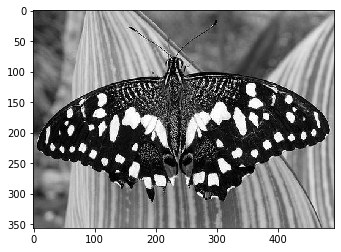

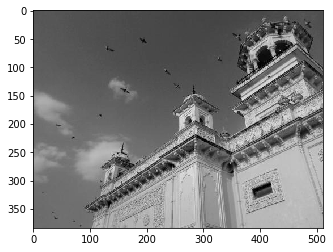

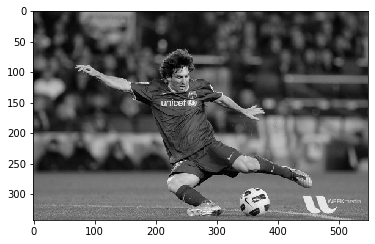

In [193]:
image1 = read_img_gray("butterfly4.jpg")
display_img_gray(image1)
image2 = read_img_gray("home.jpg")
display_img_gray(image2)
image3 = read_img_gray("messi.jpg")
display_img_gray(image3)

In [194]:
def sobel_filter(img):
    Gx = cv.Sobel(src=img, ddepth=cv.CV_64F, dx=1, dy=0, ksize=3) #pochodna w kierunku x
    Gy = cv.Sobel(src=img, ddepth=cv.CV_64F, dx=0, dy=1, ksize=3) #pochodna w kierunku y
    G = np.sqrt(Gx**2 + Gy**2) #aproksymacja gradientu
    G_norm = (G / np.max(G) * 255).astype(np.uint8) #normowanie do całkowitych poziomów szarości z zakresu [0, 255]
    return G_norm

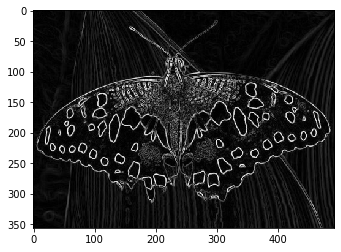

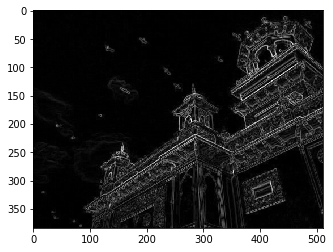

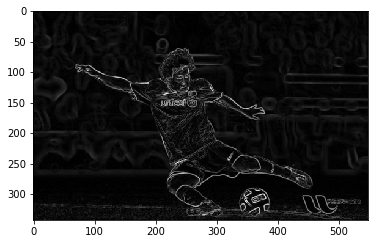

In [195]:
image1_edges = sobel_filter(image1)
display_img_gray(image1_edges)
image2_edges = sobel_filter(image2)
display_img_gray(image2_edges)
image3_edges = sobel_filter(image3)
display_img_gray(image3_edges)

Przeprowadzone eksperymenty dla przykładowych obrazów pozwalają stwierdzić, że zaimplementowany filtr Sobela poprawnie wykrywa krawędzie. Im większy kontrast pomiędzy intensywnością pikseli rozdzielanych krawędzią na oryginalnym obrazie, tym mocniej jest ta krawędź zaznaczona w wynikowym obrazie.

## Zaobserwuj działanie Laplasjanu do wyostrzania szczegółów.